# Visualisation of a Random Walk in 2 Dimensions

## bm_df Generation

In [92]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from plotnine import *
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly
import plotly.express as px
import imageio
import os

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [15]:
def bm_2D(n, mu1 = 0, std1 = 1, mu2 = 0, std2 = 1, seed = 42):
    np.random.seed(seed)
    x = np.cumsum(np.random.normal(mu1, std1, n))
    y = np.cumsum(np.random.normal(mu2, std2, n))
    df = pd.DataFrame(np.c_[x, y], columns = ['x', 'y'])
    df['time'] = df.reset_index().index
    return df

In [82]:
def rw_2D(n, seed = 42):    
    np.random.seed(seed)
    x = np.random.choice([-1, 1], size = n)
    y = np.random.choice([-1, 1], size = n)
    df = pd.DataFrame(np.c_[np.cumsum(x), np.cumsum(y)], columns= ['x', 'y'])
    df['time'] = df.reset_index().index
    return df

In [95]:
def poisson_bw_2D(
    n, rate=1000, jump_std=3, mu1=0, std1=1, mu2=0, std2=1, seed=42
):
    np.random.seed(seed)
    x = np.cumsum(np.random.normal(mu1, std1, n))
    y = np.cumsum(np.random.normal(mu2, std2, n))
    nr_jumps_x = np.random.poisson(rate)
    nr_jumps_y = np.random.poisson(rate)
    jump_times_x = np.random.randint(0, n, size = nr_jumps_x)
    jump_times_y = np.random.randint(0, n, size = nr_jumps_y)
    jump_sizes_x = np.random.normal(scale=jump_std, size= nr_jumps_x)
    jump_sizes_y = np.random.normal(scale=jump_std, size= nr_jumps_y)
    x[jump_times_x] += jump_sizes_x
    y[jump_times_y] += jump_sizes_y
    
    df = pd.DataFrame(np.c_[x, y], columns = ['x', 'y'])
    df['time'] = df.reset_index().index
    return df

In [33]:
# brownian motion
bm_df = bm_2D(10000)

In [83]:
# random walk 
rw_df = rw_2D(10000)

In [96]:
# brownian motion with jumps
bm_jump_df = poisson_bw_2D(10000)

## Visualisation

### Brownian Motion:

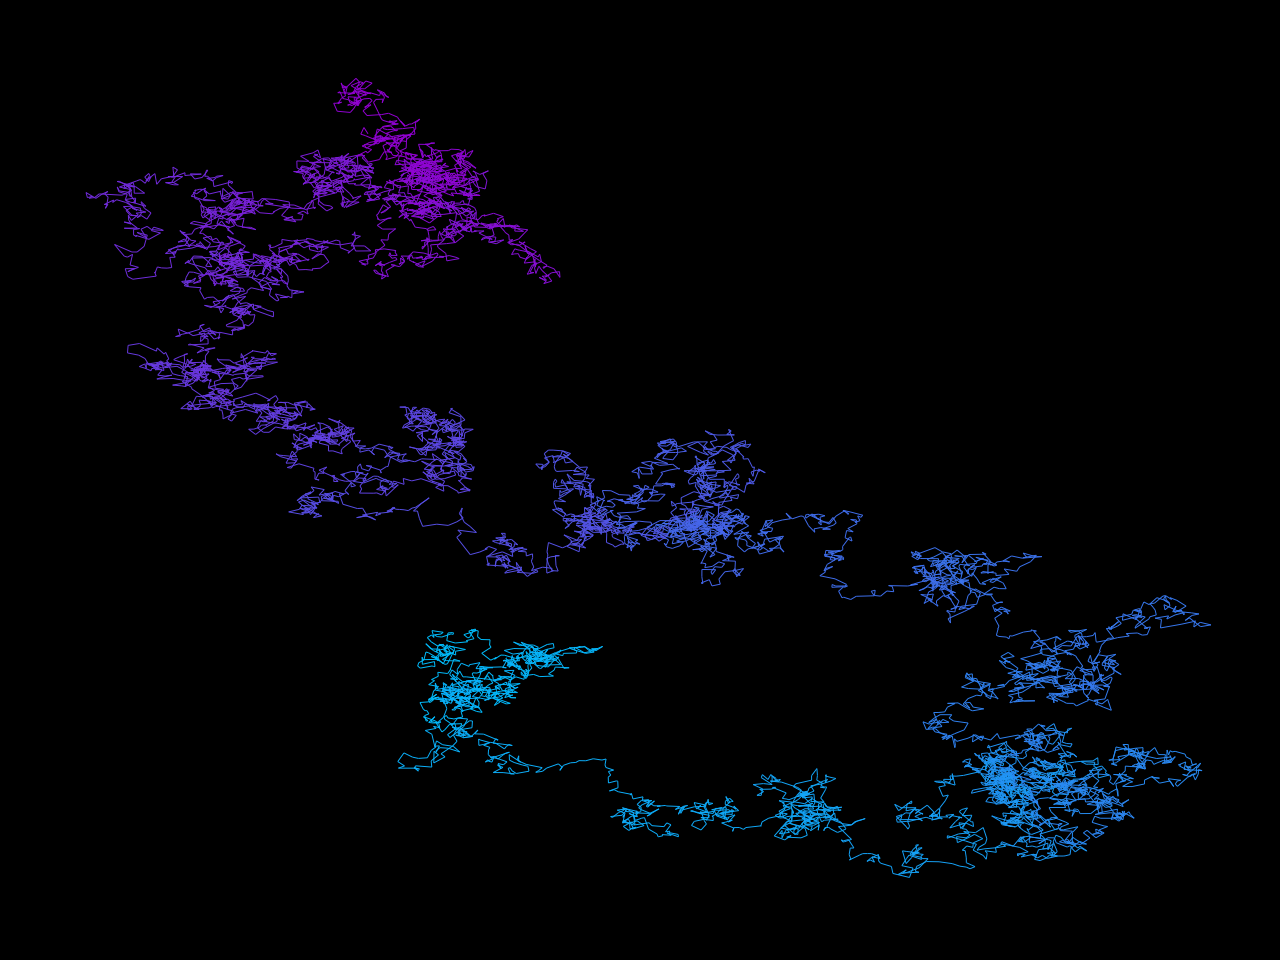

<Figure Size: (640 x 480)>

In [73]:
(
    ggplot(bm_df, aes(x = 'x', y = 'y')) +
    geom_path(aes(group = 1, color = 'time'), size = 0.2) +
    scale_color_gradient(low="deepskyblue", high="darkviolet") + 
    theme_void() +
    theme(legend_position='none') +
    theme(plot_background=element_rect(fill="black"))
)

In [78]:
# List to store file names
file_names = []

for i in tqdm(range(1, len(bm_df) + 1, 20)):
    # Generate plot for each frame
    p = (
        ggplot(bm_df.iloc[:i, :], aes(x = 'x', y = 'y')) +
        geom_path(aes(group = 1, color = 'time'), size = 0.2) +
        scale_color_gradient(low="deepskyblue", high="darkviolet") + 
        theme_void() +
        theme(legend_position='none') +
        theme(plot_background=element_rect(fill="black"))
    )
    
    # Save each frame as an image
    filename = f"Animations/frame_{i}.png"
    p.save(filename, width=6, height=4, dpi=100)
    file_names.append(filename)

# Combine frames into a GIF
imageio.mimsave('animated_path.gif', [imageio.imread(f) for f in file_names], fps=60)

# Optionally, clean up the individual frame images
for f in file_names:
    os.remove(f)

  0%|          | 0/500 [00:00<?, ?it/s]

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6 x 4 in image.

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning:

Filename: Animations/frame_1.png

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning:

geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6 x 4 in image.

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning:

Filename: Animations/frame_21.png

/home/janhsc/miniconda3/envs/MachineLearning/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning:

Saving 6 x 4 in image.

/home/janhsc/miniconda3/envs/MachineLearning/lib/python

### Random Walk:

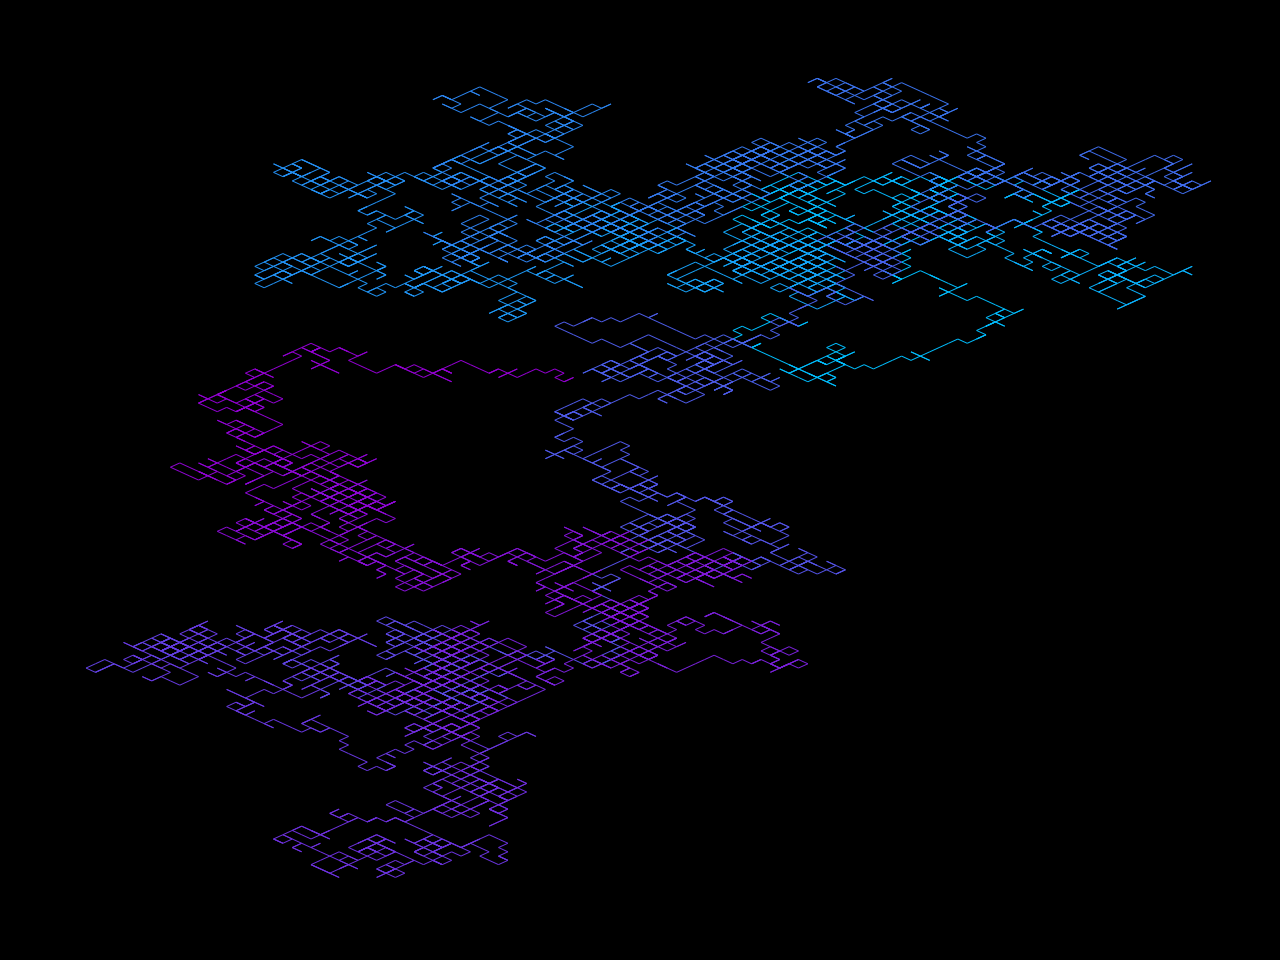

<Figure Size: (640 x 480)>

In [84]:
(
    ggplot(rw_df, aes(x = 'x', y = 'y')) +
    geom_path(aes(group = 1, color = 'time'), size = 0.2) +
    scale_color_gradient(low="deepskyblue", high="darkviolet") + 
    theme_void() +
    theme(legend_position='none') +
    theme(plot_background=element_rect(fill="black"))
)

### Wiener Process with Poisson Induced Jumps:

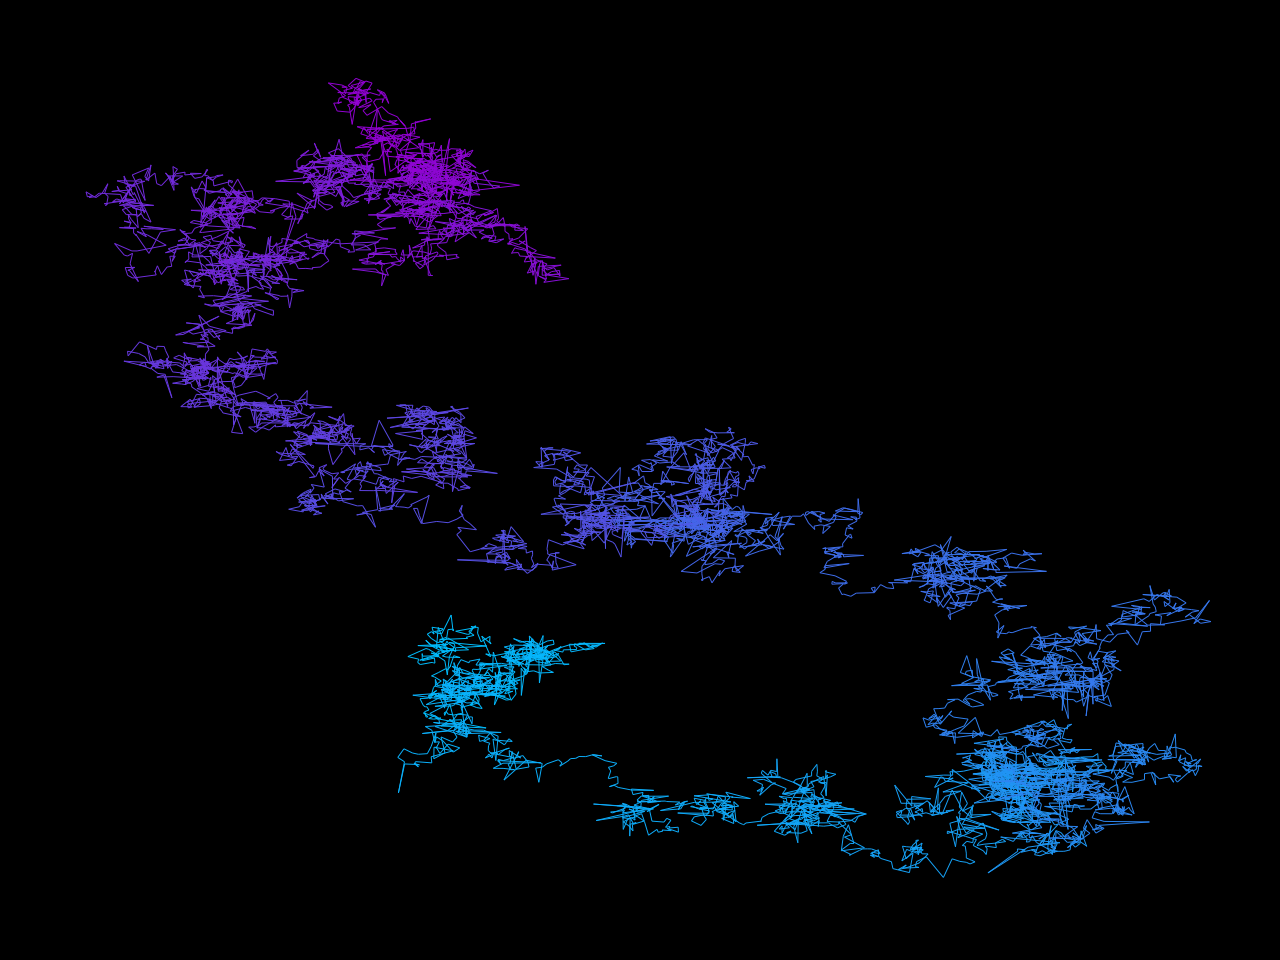

<Figure Size: (640 x 480)>

In [98]:
(
    ggplot(bm_jump_df, aes(x = 'x', y = 'y')) +
    geom_path(aes(group = 1, color = 'time'), size = 0.2) +
    scale_color_gradient(low="deepskyblue", high="darkviolet") + 
    theme_void() +
    theme(legend_position='none') +
    theme(plot_background=element_rect(fill="black"))
)

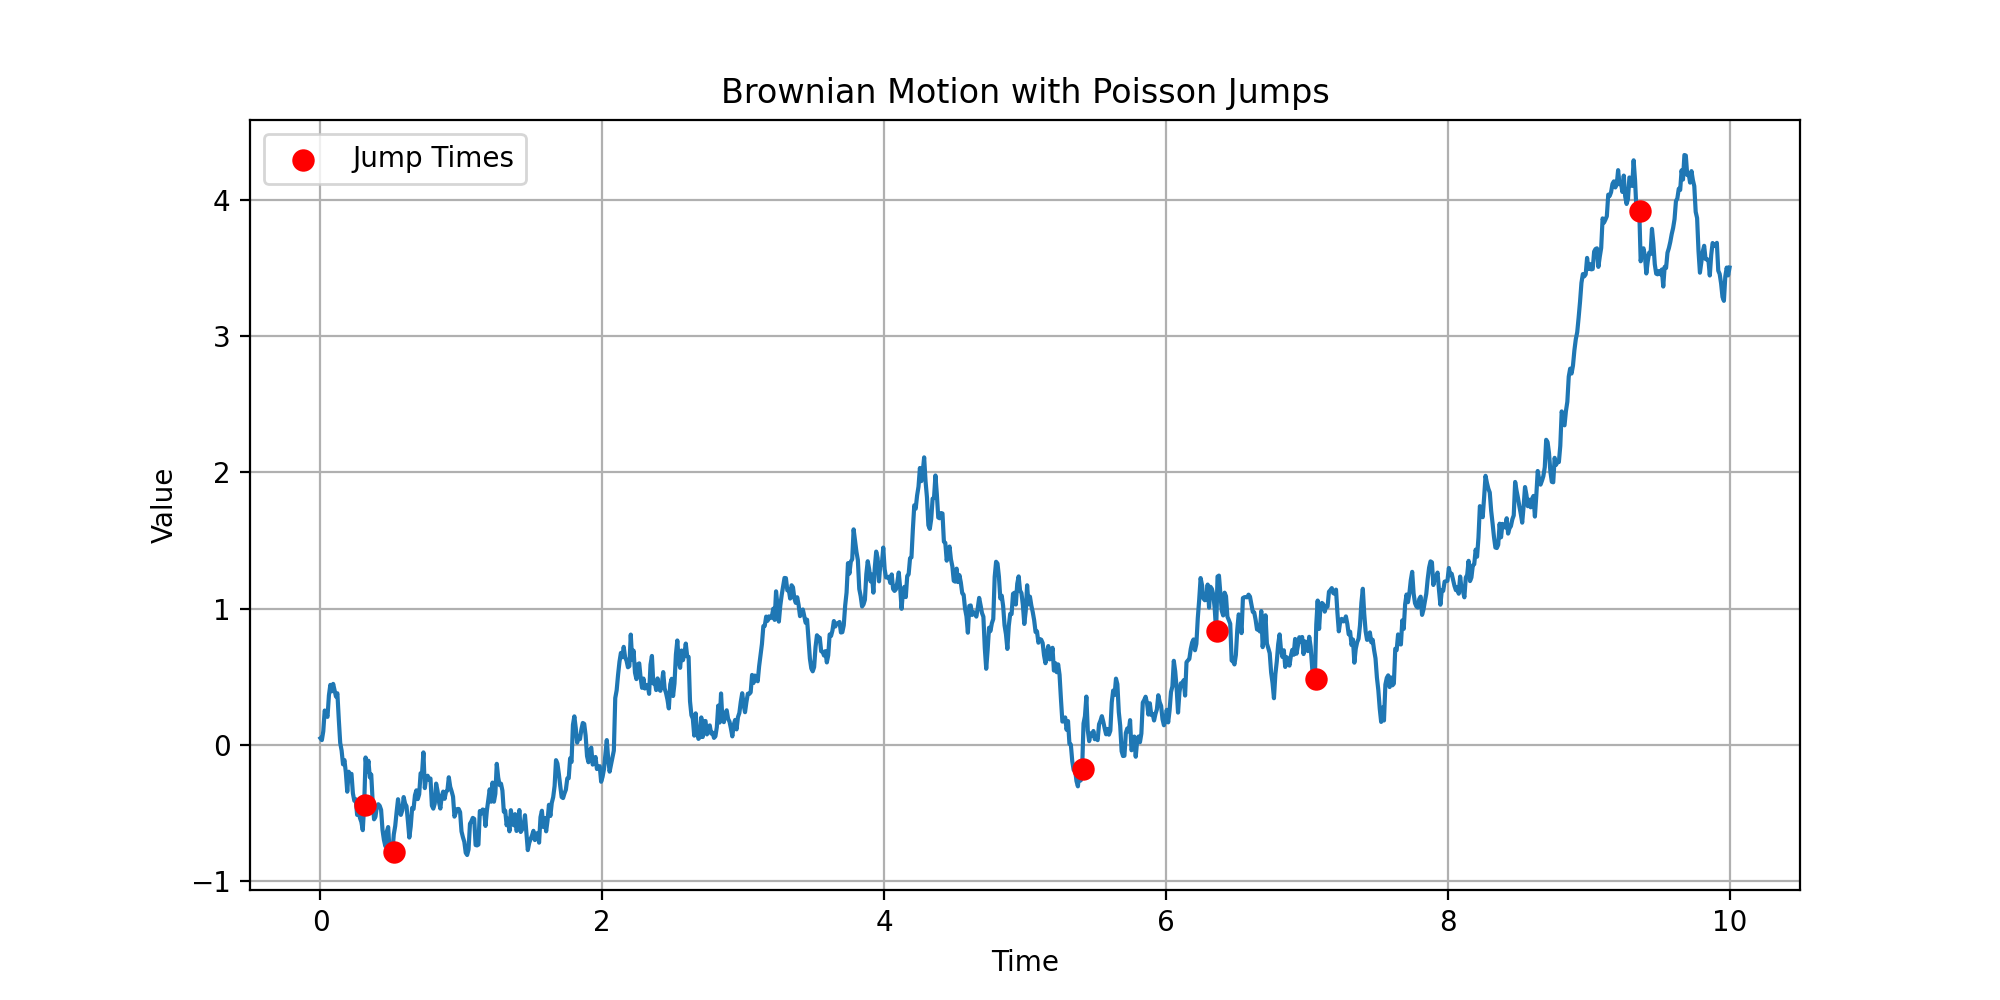

In [91]:
# Parameters
N = 1000
T = 10
dt = T/N
time_points = np.linspace(0, T, N)
lambda_rate = 1  # Poisson rate
jump_std = 0.5  # standard deviation of jump sizes

np.random.seed(42)
# Simulate Brownian motion (Wiener process)
brownian_path = np.cumsum(np.sqrt(dt) * np.random.randn(N))

# Introduce Poisson jumps
num_jumps = np.random.poisson(lambda_rate * T)
jump_times = np.sort(np.random.uniform(0, T, num_jumps))
jump_sizes = np.random.normal(scale=jump_std, size=num_jumps)

for t, delta in zip(jump_times, jump_sizes):
    idx = np.searchsorted(time_points, t)
    brownian_path[idx:] += delta

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time_points, brownian_path)
plt.scatter(jump_times, brownian_path[np.searchsorted(time_points, jump_times)-1], color='red', s=50, zorder=5, label='Jump Times')
plt.title('Brownian Motion with Poisson Jumps')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()